In [21]:
import os
import tarfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re

In [22]:
# Download NLTK data files (only for the first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
data_path = " /content/20_newsgroups.tar.gz"
extracted_path = "/content/extract_path"

In [28]:
if not os.path.exists(extracted_path):
    with tarfile.open(data_path, 'r:gz') as tar:
         tar.extractall(path=extracted_path)



In [29]:
# Load the data from the specific category
category_path = os.path.join(extracted_path, '/content/misc.forsale')
documents = []

for file_name in os.listdir(category_path):
    file_path = os.path.join(category_path, file_name)
    with open(file_path, 'r', encoding='latin1') as file:
        documents.append(file.read())



In [30]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

documents = [preprocess(doc) for doc in documents]



In [31]:
# Convert the text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the topics found by LDA
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Topic 0:
chemistry book hmmeyersilverucsindianaedu meyer han motorola junk mailing writing chopinudeledu
Topic 1:
radleygibbsoituncedu al vcr switch radley uk xreceived jafandrewcmuedu norman aleeecsumassedu
Topic 2:
00 rupindangdartmouthedu hanover newsdartvaxdartmouthedu dartmouth nh rupin 1st dang lens
Topic 3:
stand resume laserjet george turbografx toner northwestern coupon courage custom
Topic 4:
aprmnemosynecsduedu khohuscedu angeles los ailin nyx usenetmnemosynecsduedu mathcs netnews denver
Topic 5:
bitzmcolumbiadsuedu clemson eric dakota sc bitz development dare sega writes
Topic 6:
jthbachudeledu jay room bachudeledu garage bedroom thomas living sleeve usenetnewsudeledu
Topic 7:
sale miscforsale gmt university sender new offer drive nntppostinghost email
Topic 8:
brian oplingerracrdgecom saletrade marc gtcprismgatechedu expense aircraft uk thorson contains
Topic 9:
voucher goh lens munroe table park kmgohlelandstanfordedu award hotel mm


In [32]:
# Apply K-means for document clustering
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

# Attach the cluster labels to the documents
df = pd.DataFrame({'Document': documents, 'Cluster': km.labels_})



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Display the clustering results
print(df.head())

# Save the clustering results to a CSV file
df.to_csv('document_clusters.csv', index=False)

                                            Document  Cluster
0  path cantaloupesrvcscmuedurochesterudelgatechh...        8
1  path cantaloupesrvcscmueducrabapplesrvcscmuedu...        2
2  path cantaloupesrvcscmuedumagnesiumclubcccmued...        7
3  path cantaloupesrvcscmuedudasnewsharvardedunoc...        5
4  newsgroups miscforsale path cantaloupesrvcscmu...        1


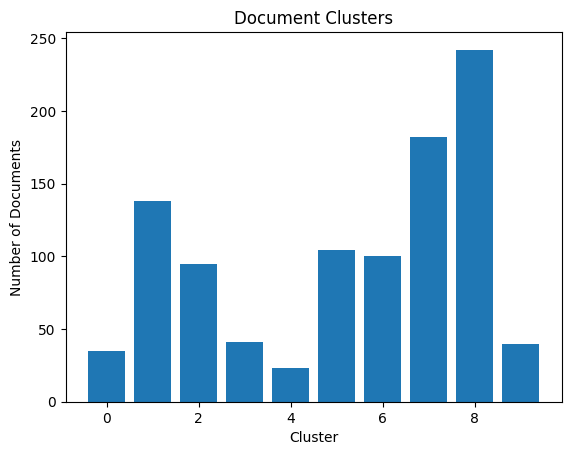

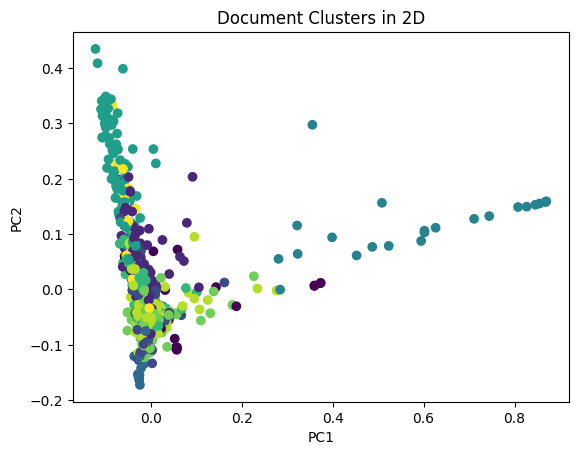

In [34]:
#Visualizing and interpretating the clustering results.
import matplotlib.pyplot as plt

# Create a bar chart of the cluster sizes
cluster_counts = df['Cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.title('Document Clusters')
plt.show()

# Create a scatter plot of the documents in 2D space using the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Document Clusters in 2D')
plt.show()
